# Introduction

We are interested in using Neural Networks to train a model that can classify handwritten digits. The dataset is directly imported from sklearn.datasets

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
labels = pd.Series(digits['target'])

In [5]:
data = pd.DataFrame(digits['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


We see that each column is a corresponding pixel in an 8x8 image from 0~64 

## Visualizing the digits

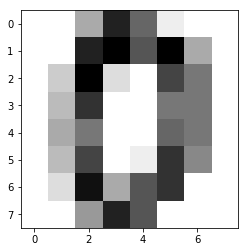

In [6]:
first = data.iloc[0]
np_image = first.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

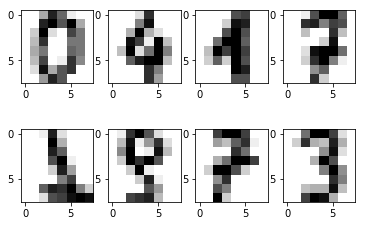

In [7]:
fig, ax = plt.subplots(2,4)
ax[0,0].imshow(data.iloc[0].values.reshape(8,8),cmap='gray_r')
ax[0,1].imshow(data.iloc[100].values.reshape(8,8),cmap='gray_r')
ax[0,2].imshow(data.iloc[200].values.reshape(8,8),cmap='gray_r')
ax[0,3].imshow(data.iloc[300].values.reshape(8,8),cmap='gray_r')
ax[1,0].imshow(data.iloc[1000].values.reshape(8,8),cmap='gray_r')
ax[1,1].imshow(data.iloc[1100].values.reshape(8,8),cmap='gray_r')
ax[1,2].imshow(data.iloc[1200].values.reshape(8,8),cmap='gray_r')
ax[1,3].imshow(data.iloc[1300].values.reshape(8,8),cmap='gray_r')


# K-Nearest Neighbors

Let's first try it with a non-neural network algorithm - KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_knn(n_neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(train_features, train_labels)
    return knn

def test_knn(knn_model, test_features, test_labels):
    predictions = knn_model.predict(test_features)
    df = pd.DataFrame()
    df['correct_label'] = test_labels
    df['predicted_label'] = predictions
    accurate = df['correct_label']==df['predicted_label']
    accuracy = sum(accurate)/len(df)
    return accuracy

def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        accuracy = test_knn(model, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies
        
knn_1 = cross_validate(1)
np.mean(knn_1)

0.9677233358079684

In [9]:
accuracies = []
for k in list(range(1,10)):
    accuracies.append(np.mean(cross_validate(k)))

print(accuracies)

[0.9677233358079684, 0.9616010888393962, 0.9627183865379857, 0.9649480326651819, 0.9621665429349171, 0.9588270230141054, 0.9571591190299431, 0.9571578817124474, 0.9543801039346697]


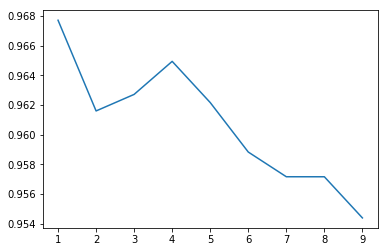

In [10]:
plt.plot(list(range(1,10)), accuracies)

We see that the accuracies drop when we increase K.

# NN with One Hidden Layer

In [11]:
from sklearn.neural_network import MLPClassifier

def train_nn(neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = neurons)
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(nn_model, test_features, test_labels):
    predictions = nn_model.predict(test_features)
    df = pd.DataFrame()
    df['correct_label'] = test_labels
    df['predicted_label'] = predictions
    accuracy = sum(df['correct_label']==df['predicted_label'])/len(df)
    return accuracy

def cross_validate(neurons):
    accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neurons, train_features, train_labels)
        accuracies.append(test_nn(model,test_features, test_labels))
    return accuracies

nn_1 = cross_validate((1,))
print(nn_1)
np.mean(nn_1)

C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.19333333333333333, 0.10467706013363029, 0.24498886414253898, 0.10022271714922049]


0.16080549368968078

One neuron with one layer is clearly not very accurate.

C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

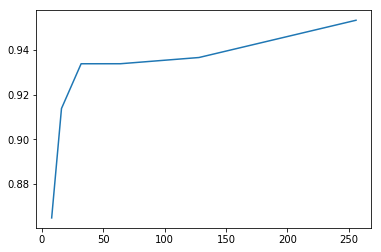

In [12]:
nn_one_layer = [    
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
accuracies = []

for n in nn_one_layer:
    accuracies.append(np.mean(cross_validate(n)))
    
x = [i[0] for i in nn_one_layer]

plt.plot(x,accuracies)

In [13]:
print(accuracies)

[0.8647735708982925, 0.9137441227418955, 0.933772581044296, 0.9337800049492699, 0.9365639693145261, 0.9532479584261322]


But as we increase the number of neurons, the accuracies become very good even with just one hidden layer.

# NN with Two Layers

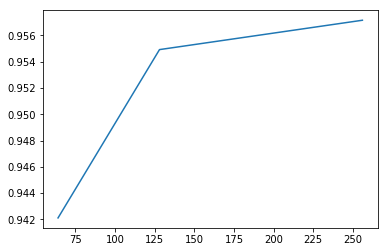

In [16]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]

accuracies = []

for n in nn_two_neurons:
    accuracies.append(np.mean(cross_validate(n)))
    
x = [i[0] for i in nn_two_neurons]

plt.plot(x,accuracies)

Using two hidden layers, we were able to improve our accuracy to close to over 95%.

# NN with Three Layers

C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joe\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

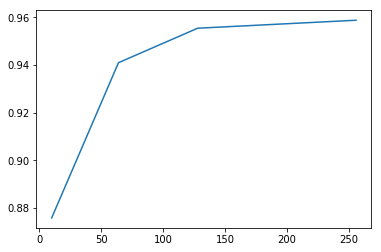

In [17]:
nn = [10, 64, 128, 256]
acc = []

for i in nn:
    acc.append(np.mean(cross_validate((i,i,i))))
    
plt.plot(nn,acc)

In [18]:
accuracies

[0.9421121009651076, 0.9549158624102945, 0.9571492204899777]

Using three hidden layers, we were able to improve our accuracy even further to almost 96% with 4 fold cross-validation. 